#### Getting the centrality metrics for a graph.

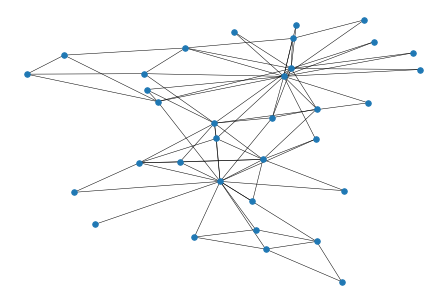

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
pos=nx.spring_layout(G)
nx.draw(G, node_size=30, width=0.5)

#### ``networkx`` has numerous centrality metrics for us to try out.

See [this website](https://networkx.org/documentation/stable/reference/algorithms/centrality.html) for a list of all metrics included.

In [2]:
deg=nx.degree_centrality(G)
bet=nx.betweenness_centrality(G)
close=nx.closeness_centrality(G)
## eigen=nx.eigenvector_centrality(G)
## and many many more

We may plot the centrality metrics one-by-one and set them as a node parameter.

In [3]:
for i in G.nodes():
    print(i, deg[i], bet[i], close[i])
nx.set_node_attributes(G, bet, 'betweenness')

0 0.48484848484848486 0.43763528138528146 0.5689655172413793
1 0.2727272727272727 0.053936688311688304 0.4852941176470588
2 0.30303030303030304 0.14365680615680618 0.559322033898305
3 0.18181818181818182 0.011909271284271283 0.4647887323943662
4 0.09090909090909091 0.0006313131313131313 0.3793103448275862
5 0.12121212121212122 0.02998737373737374 0.38372093023255816
6 0.12121212121212122 0.029987373737373736 0.38372093023255816
7 0.12121212121212122 0.0 0.44
8 0.15151515151515152 0.05592682780182781 0.515625
9 0.06060606060606061 0.0008477633477633478 0.4342105263157895
10 0.09090909090909091 0.0006313131313131313 0.3793103448275862
11 0.030303030303030304 0.0 0.36666666666666664
12 0.06060606060606061 0.0 0.3707865168539326
13 0.15151515151515152 0.04586339586339586 0.515625
14 0.06060606060606061 0.0 0.3707865168539326
15 0.06060606060606061 0.0 0.3707865168539326
16 0.06060606060606061 0.0 0.28448275862068967
17 0.06060606060606061 0.0 0.375
18 0.06060606060606061 0.0 0.370786516853

#### Visualizing the centrality metrics.

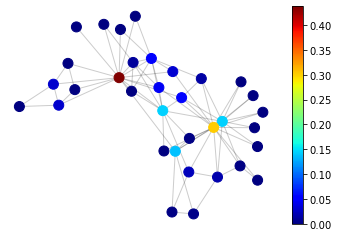

In [4]:
colors = [bet[i] for i in G.nodes()]

ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, 
                            node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

#### Calculating centralization.

In [5]:
maxDeg=max(deg.values())
maxBet=max(bet.values())
maxClose=max(close.values())

deg_centralization=sum(maxDeg-deg[i] for i in G.nodes())/(G.number_of_nodes()-2)
print(deg_centralization)

bet_centralization=sum(maxBet-bet[i] for i in G.nodes())/(G.number_of_nodes()-1)
print(bet_centralization)

close_centralization=sum(maxClose-close[i] for i in G.nodes())/((G.number_of_nodes()-1)*(G.number_of_nodes()-2)/(2*G.number_of_nodes()-3))
print(close_centralization)

0.39962121212121215
0.4055571953299228
0.298194891208297


#### In-class activity: small network.

In [7]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(3,4), (3,5), (3,6), (4,5), (4,6), (5,6)])
deg=nx.degree_centrality(G)
print("Degree:", deg)
bet=nx.betweenness_centrality(G)
print("Betweenness:", bet)
close=nx.closeness_centrality(G)
print("Closeness:", close)

Degree: {1: 0.4, 2: 0.4, 3: 1.0, 4: 0.6000000000000001, 5: 0.6000000000000001, 6: 0.6000000000000001}
Betweenness: {1: 0.0, 2: 0.0, 3: 0.6000000000000001, 4: 0.0, 5: 0.0, 6: 0.0}
Closeness: {1: 0.625, 2: 0.625, 3: 1.0, 4: 0.7142857142857143, 5: 0.7142857142857143, 6: 0.7142857142857143}


In [8]:
maxDeg=max(deg.values())
maxBet=max(bet.values())
maxClose=max(close.values())

deg_centralization=sum(maxDeg-deg[i] for i in G.nodes())/(G.number_of_nodes()-2)
print(deg_centralization)

bet_centralization=sum(maxBet-bet[i] for i in G.nodes())/(G.number_of_nodes()-1)
print(bet_centralization)

close_centralization=sum(maxClose-close[i] for i in G.nodes())/((G.number_of_nodes()-1)*(G.number_of_nodes()-2)/(2*G.number_of_nodes()-3))
print(close_centralization)

0.5999999999999999
0.6000000000000001
0.7232142857142855


#### In-class activity: centrality and centralization

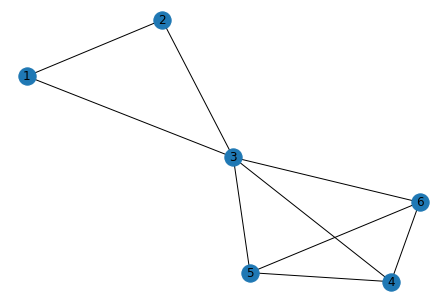

In [10]:
G=nx.Graph()
edgelist=[(1,2),(1,3),(2,3),(3,4),(3,5),(3,6),(4,5),(4,6),(5,6)]
G.add_edges_from(edgelist)

deg=nx.degree_centrality(G)
bet=nx.betweenness_centrality(G)
close=nx.closeness_centrality(G)

nx.draw(G, with_labels=True)

In [11]:
for i in G.nodes():
    print(round(deg[i],3), round(bet[i],3), round(close[i],3))

0.4 0.0 0.625
0.4 0.0 0.625
1.0 0.6 1.0
0.6 0.0 0.714
0.6 0.0 0.714
0.6 0.0 0.714


In [12]:
maxDeg=max(deg.values())
maxBet=max(bet.values())
maxClose=max(close.values())

deg_centralization=sum(maxDeg-deg[i] for i in G.nodes())/(G.number_of_nodes()-2)
print(deg_centralization)

bet_centralization=sum(maxBet-bet[i] for i in G.nodes())/(G.number_of_nodes()-1)
print(bet_centralization)

close_centralization=sum(maxClose-close[i] for i in G.nodes())/((G.number_of_nodes()-1)*(G.number_of_nodes()-2)/(2*G.number_of_nodes()-3))
print(close_centralization)

0.5999999999999999
0.6000000000000001
0.7232142857142855
